Import libraries and dataset

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data from Google Drive
from google.colab import drive
drive.mount('/content/drive')
project_dir = 'drive/MyDrive/Capstone/'
dataset = pd.read_excel(project_dir+'FT100.xlsx',sheet_name=['2022','2021','2020','2019','3_years','feature_engineer'])

df = dataset['feature_engineer']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Define X and Y

In [ ]:
#X
rank = df['#']

#Y
metrics = [
    'Overall satisfaction',
    'Career service rank',
    'Faculty with doctorates (%)',
    'Women on board (%)',
    'International course experience rank',
    'International faculty (%)',
    'International mobility rank',
    'Employed in three months',
    'Career progress rank',
    'Female students (%)',
    'Female faculty (%)',
    'Value for money rank',
    'International students (%)',
    'Internships (%)',
    'International board (%)',
    'Weighted salary (US$)',
    'Aims achieved (%)',
    'Company internships (%)',
    'Salary percentage increase',
    'Salary today (US$)',
    'Average course length (months)',
    #'Overall satisfaction Growth Rate',
    'Overall satisfaction Initial-Final Difference',
    'Weighted Salary Binary',
    #'Weighted Salary Category',
    'Gender Diversity Score']
    #'Overall satisfaction Z-score']

## Feature Selection (Filter Method vs Wrapper Method)
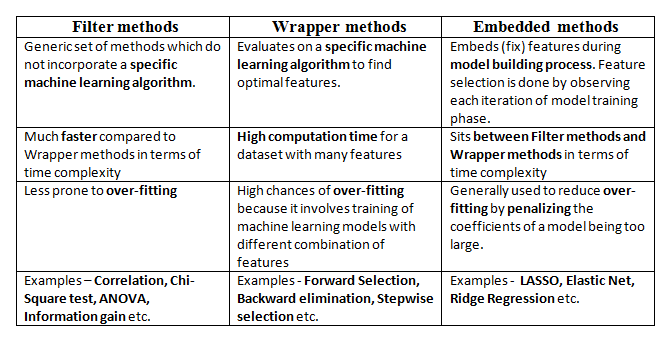

### 1. Filter Method:

**Explain**
- *Filter Method*: Assign score to each feature and rank by score, eventually "k" features have higher score than given threshold will be selected.
- In this example I use SelectKBest to select the top k features
- *SelectKBest*: is feature selection method of Scikit-learn library according to highest K score --> Purpose is to improve the performance of models by reducing the dimensionality of the data.




In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier

y = rank
X = df[metrics]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# number of features to select
k = 15
select_k_best = SelectKBest(f_classif, k=k)
X_train_selected = select_k_best.fit_transform(X_train, y_train)
X_test_selected = select_k_best.transform(X_test)

# Get selected feature names
selected_features = X.columns[select_k_best.get_support()]
print("Selected features (Filter Method): ", selected_features.tolist())

Selected features (Filter Method):  ['Overall satisfaction', 'Career service rank', 'Women on board (%)', 'International course experience rank', 'International mobility rank', 'Employed in three months', 'Career progress rank', 'Female faculty (%)', 'International students (%)', 'Weighted salary (US$)', 'Aims achieved (%)', 'Salary percentage increase', 'Salary today (US$)', 'Weighted Salary Binary', 'Gender Diversity Score']


### 2. Wrapper Method
**Explain**

Filter Method: Assign score to each feature and rank by score, eventually "k" features have higher score than given threshold will be selected.
In this example I use SelectKBest to select the top k features
SelectKBest: is feature selection method of Scikit-learn library according to highest K score --> Purpose is to improve the performance of models by reducing the dimensionality of the data.

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE

# Assuming X_train, y_train are already defined

k = 15
rfe_selector = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=k, step=1)
rfe_selector = rfe_selector.fit(X_train, y_train)

# Get the rankings of the features
ranking = rfe_selector.ranking_
selected_mask = rfe_selector.support_
feature_importances = rfe_selector.estimator_.feature_importances_

# Map the feature importances to the names of the selected features
selected_feature_names = X_train.columns[selected_mask]

print(selected_feature_names)

# Prepare the data for the DataFrame
selected_features = {
    'Feature Name': selected_feature_names,
    'Score': feature_importances
}

# Create the DataFrame
selected_features_df = pd.DataFrame(selected_features)

# Sort the DataFrame by score in descending order
selected_features_df.sort_values(by='Score', ascending=False, inplace=True)

# Reset index for the DataFrame
selected_features_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
print(selected_features_df)

Index(['Overall satisfaction', 'Career service rank', 'Women on board (%)',
       'International course experience rank', 'International mobility rank',
       'Employed in three months', 'Career progress rank',
       'Female students (%)', 'Female faculty (%)',
       'International students (%)', 'Weighted salary (US$)',
       'Salary percentage increase', 'Salary today (US$)',
       'Average course length (months)',
       'Overall satisfaction Initial-Final Difference'],
      dtype='object')
                                     Feature Name     Score
0                        Employed in three months  0.099245
1                              Salary today (US$)  0.083816
2                     International mobility rank  0.077668
3                             Career service rank  0.073286
4                            Career progress rank  0.072588
5            International course experience rank  0.072184
6                              Female faculty (%)  0.067690
7             

### 3. Embedded Method

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Select top k features
selected_features_embedded = X.columns[indices[:k]]
print("Selected features (Embedded Method):", selected_features_embedded)

Selected features (Embedded Method): Index(['Aims achieved (%)', 'International mobility rank',
       'Career service rank', 'Career progress rank', 'Weighted salary (US$)',
       'International course experience rank', 'Salary percentage increase',
       'Overall satisfaction', 'Female faculty (%)',
       'Employed in three months',
       'Overall satisfaction Initial-Final Difference',
       'International students (%)', 'Value for money rank',
       'Gender Diversity Score', 'Salary today (US$)',
       'International board (%)', 'International faculty (%)'],
      dtype='object')
